In [1]:
#Liên kết với google colab để test model
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 705.7/705.7 kB 8.8 MB/s eta 0:00:00


In [4]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()
!yolo mode=checks

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 509, in entrypoint
    raise ValueError(f"Invalid 'mode={mode}'. Valid modes are {MODES}.\n{CLI_HELP_MSG}")
ValueError: Invalid 'mode=<module 'ultralytics.utils.checks' from '/usr/local/lib/python3.10/dist-packages/ultralytics/utils/checks.py'>'. Valid modes are ('train', 'val', 'predict', 'export', 'track', 'benchmark').

    Arguments received: ['yolo', 'mode=checks']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of ('detect', 'segment', 'classify', 'pose', 'obb')
                MODE (required) is one of ('train', 'val', 'predict', 'export', 'track', 'benchmark')
                ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' that override defaults.
                    See all ARGS at ht

*Liên kết với dataset trên Roboflow

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="2EzYiygnqFUNFmffc1jY")
project = rf.workspace("tam-binh").project("garbage-detection-xjmyz")
dataset = project.version(9).download("yolov8")

**Chỉnh sửa lại thông tin trong file data.ymal**

* Trong phần "tệp" của google colab sẽ hiện thị thêm folder "Garbage-detection"
trong đó có file data.yaml, double-click vào và chỉnh sửa thông tin ở dòng 15, 16, 17.

* Copy path của folder images trong mỗi folder con test, train, valid trong folder Gargabe-detection-2 rồi thay vào file data-yaml ở các dòng tương ứng.

In [ ]:
!yolo task=detect mode=train model=yolov8m.pt data ={dataset.location}/data.yaml epochs=40 imgsz=640

Ultralytics YOLOv8.1.6 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/Garbage-detection-9/data.yaml, epochs=40, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=

Sau khi train xong sẽ xuất hiện folder "runs" tiếp tục mở tiếp folder "detect" -> "train" -> "weights" sẽ xuất hiện file "best.pt". Copy đường dẫn của thư mục này và thay vào sau chữ 'model = ' của đoạn code tiếp theo để tiến hành test.

In [11]:
import cv2

image = cv2.imread("/content/drive/MyDrive/35.jpeg")

resized_image = cv2.resize(image, dsize=(640, 640))

cv2.imwrite("resized_image.jpg", resized_image)

True

In [12]:
!yolo task=detect mode=predict model=/content/best.pt conf=0.5 source='/content/resized_image.jpg'

Ultralytics YOLOv8.1.7 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25842076 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/resized_image.jpg: 640x640 1 Glass, 1 Metal, 1 Paper, 1 Plastic, 38.4ms
Speed: 9.8ms preprocess, 38.4ms inference, 929.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


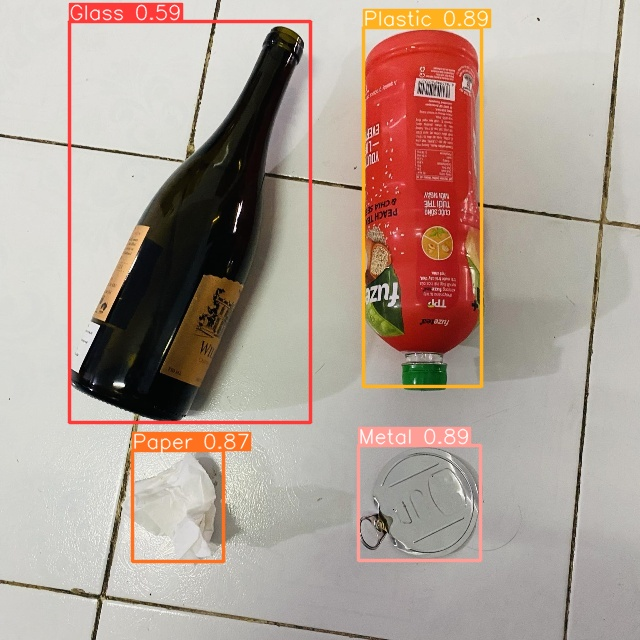

In [13]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/detect/predict/*.jpg'):
  display(Image(filename=image_path, height = 640))
  print("\n")

In [14]:
#Thông tin bounding boxes của ảnh test
model = YOLO('/content/best.pt')
res = model('/content/resized_image.jpg')
for r in res:
  print(r.boxes)


image 1/1 /content/resized_image.jpg: 640x640 1 Glass, 1 Metal, 1 Paper, 1 Plastic, 37.0ms
Speed: 1.7ms preprocess, 37.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([3., 1., 2., 0.], device='cuda:0')
conf: tensor([0.8887, 0.8880, 0.8661, 0.5875], device='cuda:0')
data: tensor([[363.9316,  27.7029, 481.7288, 386.0556,   0.8887,   3.0000],
        [358.3809, 445.5156, 480.5455, 560.3914,   0.8880,   1.0000],
        [132.5199, 450.2560, 223.3844, 561.9774,   0.8661,   2.0000],
        [ 69.1338,  21.9065, 310.8476, 422.4277,   0.5875,   0.0000]], device='cuda:0')
id: None
is_track: False
orig_shape: (640, 640)
shape: torch.Size([4, 6])
xywh: tensor([[422.8302, 206.8792, 117.7971, 358.3527],
        [419.4632, 502.9535, 122.1646, 114.8758],
        [177.9521, 506.1167,  90.8645, 111.7214],
        [189.9907, 222.1671, 241.7137, 400.5212]], device='cuda:0')
xywhn: tensor([[0.6607, 0.3232, 0.1841, 

Phát hiện được 4 bounding boxes có conf >= 0.5

Bounding boxes đầu tiên có tọa độ điểm trái trên là (364, 28) và phải dưới là (482, 386)

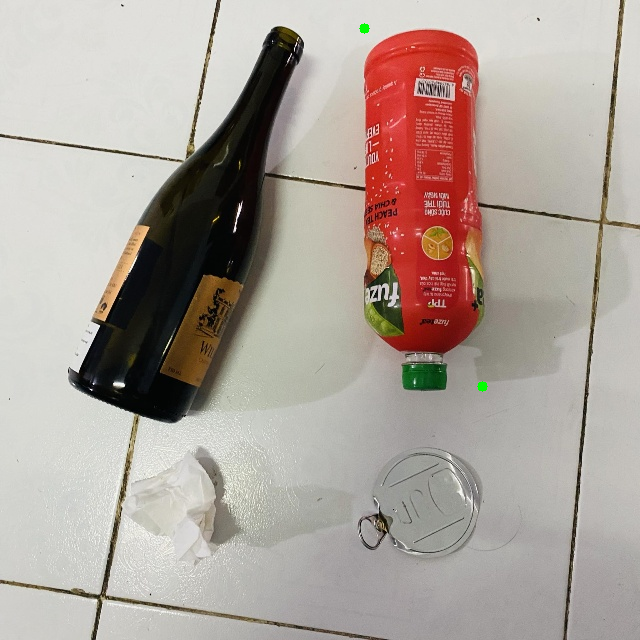

In [16]:
#Kiểm tra
import cv2
from google.colab.patches import cv2_imshow
# Đọc ảnh từ đường dẫn
image_path = "/content/resized_image.jpg"
image = cv2.imread(image_path)

cv2.circle(image, (364, 28), 5, (0, 255, 0), -1)
cv2.circle(image, (482, 386), 5, (0, 255, 0), -1)  # Đánh dấu pixel với một hình tròn màu xanh lá
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()